In [3]:
import pandas as pd
import numpy as np
import scipy.stats as st

from pathlib import Path

import os
from PIL import Image
from random import randint
from matplotlib import pyplot as plt
from wordcloud import WordCloud

In [4]:
'''
FUNCTION TO JOIN THE LYRICS OF ONE ARTIST IN ONE STRING
'''

def set_lyrics(lyrics):    
    
    lyrics_list = list(lyrics)
    return ' '.join([lyric for lyric in lyrics_list])

In [5]:
'''
FUNCTION TO GROUP THE TOP WORDS OF A LIST OF LISTS
'''

def set_words(words_list):

    list_words = [words for word_list in words_list for words in word_list]
    
    dict_list_words = {k:0 for k, v in list_words}
    dict_list_words

    for key, value in list_words:
       dict_list_words[key] = dict_list_words[key]+value

    dict_list_words

    result = list(map(tuple, dict_list_words.items()))
    
    return sorted(result, key = lambda x: x[1], reverse = True)

In [6]:
'''
FUNCTION TO GET THE TOP WORDS WITH THE FREQUENCES OF ONE LYRIC LIST IN ORDER DESCENDENT
'''

def get_list_words_freq(words_list):
    
    return sorted([word for word in words_list[0]],key = lambda x: x[1], reverse = True)

In [7]:
'''
FUNCTION TO GET THE WORDS OF ONE ARTIST
'''
def get_list_words(words_list):
    
    return [word[0] for word in words_list]

In [8]:
'''
FUNCTION TO GET THE CATEGORIZATION OF LYRICS
'''
def categorize_lyrics(words_list):
    category = ''
    
    love_list = ['love', 'heart', 'kiss', 'heartless', 'beautiful,  girlfriend', 'sorry', 'boyfriend', 'hate', 'miss', 'jealous', 'sincere', 'hurt', 'cupid', 'lovethere', 'baby', 'cry', 'happy', 'tear', 'hope']
    christmas_list = ['christmas', 'santa', 'claus', 'snow', 'snowman', 'winter', 'jesus', 'crucify', 'christmasi']
    relationships_list = ['karma','girl', 'people', 'friend', 'boy', 'young', 'family', 'child', 'husband', 'daugther', 'mother', 'wife', 'person', 'parent', 'friendship', 'relationship', 'mum', 'neighbor']
    music_list = ['dance', 'party', 'kiss', 'music', 'sound', 'disco', 'dancer', 'dancebaby', 'guitar disc', 'jockey', 'lullaby', 'piano']
    rude_list = ['fuck', 'nigga', 'bitch', 'stupid', 'bastard', 'motherfukin''', 'motherfucker', 'killer', 'crime', 'rough', 'cocaine', 'addict', 'gangster', 'shit', 'asshole', 'murderer', 'sinner', 'hardcore', 'drunken', 'fucker', 'violent']
    pleasure_list = ['delicious', 'desire', 'ecstasytonge', 'wish', 'lick', 'sexy', 'pleasure', 'naughty', 'panty', 'candy', 'scent', 'cake', 'eat', 'tea', 'horny', 'flavour', 'ménage', 'à', 'trois', 'chub', 'excite', 'feminine']
    
    love_count = len(list(set(love_list) & set(words_list)))
    xmas_count = len(list(set(christmas_list) & set(words_list)))
    relations_count = len(list(set(relationships_list) & set(words_list)))
    music_count = len(list(set(music_list) & set(words_list)))
    rude_count = len(list(set(rude_list) & set(words_list)))
    pleasure_count = len(list(set(pleasure_list) & set(words_list)))
    
    
    if (love_count >= max(xmas_count, relations_count, music_count, rude_count, pleasure_count)):
        category = 'Love'
    elif (xmas_count >= max(love_count, relations_count, music_count, rude_count, pleasure_count)):
        category = 'Xmas'
    elif (relations_count >= max(love_count, xmas_count, music_count, rude_count, pleasure_count)):
        category = 'Relationship'
    elif (music_count >= max(love_count, xmas_count, relations_count, rude_count, pleasure_count)):
        category = 'Music'
    elif (rude_count >= max(love_count, xmas_count, relations_count, music_count, pleasure_count)):
        category = 'Explicit'
    elif (pleasure_count >= max(love_count, xmas_count, relations_count, music_count, rude_count)):
        category = 'Pleasure'
    else:
        catefory = 'None'

    return category
    

In [9]:
dataset_full = pd.read_csv(Path('data/dataset_full.csv'))
dataset_full['Lyrics'] = dataset_full['Lyrics EN'].apply(eval).apply(lambda x: set_lyrics(x))
dataset_full['Sentiment'] = dataset_full['Sentiment'].apply(eval).apply(np.mean)
dataset_full['Sentiment'] = dataset_full['Sentiment'].fillna(0)
dataset_full['top words'] = dataset_full['top words'].apply(eval).apply(lambda x: set_words(x))
dataset_full['category'] = dataset_full['top words'].apply(lambda x: categorize_lyrics(get_list_words(x)))
dataset_full['category'] = dataset_full['category'].fillna('None')
dataset_full.drop(columns=['Unnamed: 0','Language','Lyrics EN'], inplace=True)
dataset_full

,Artist,Gender,Genre,Band,Lyrics,Sentiment,top words,category
0,Taylor Swift,female,pop,no,"I have this thing where I get older, but just ...",-0.627420,"[(want, 20), (like, 15), (get, 13), (midnight,...",Relationship
1,Bad Bunny,male,reggaeton,no,"Yeah-Yeah-Yyah-Yyah-Yyeah-Yeah, heThey presume...",-0.617588,"[(like, 23), (look, 13), (cute, 13), (take, 11...",Love
2,Drake,male,hip hop,no,"Go buy a zip of weed, hit the club Pay for 'bo...",-0.997391,"[(get, 51), (like, 31), (go, 31), (bullshit, 3...",Explicit
3,The Weeknd,male,rnb,no,"What makes a grown man wanna cry? (Cry, cry, c...",0.063055,"[(time, 30), (matter, 21), (baby, 12), (heart,...",Love
4,BTS,male,K-pop,yes,WAS It Honestly the Best?'Cause I Just Wanna S...,0.957200,"[(like, 32), (get, 25), (come, 17), (let, 16),...",Love
...,...,...,...,...,...,...,...,...
95,Oliver Tree,male,electronic,no,Don't remind me I'm mindin' my own damn busine...,-0.990331,"[(like, 24), (fret, 22), (see, 22), (happen, 2...",Love
96,Polo G,male,rap,no,(Tahj Money) (I bet my last track probably gav...,-0.303885,"[(get, 29), (nigga, 12), (day, 12), (fuck, 9),...",Love
97,Zach Bryan,male,country,no,"It'll be fine by dusk light, I'm tellin' you, ...",-0.500519,"[(go, 12), (let, 11), (sun, 9), (night, 9), (l...",Love
98,Jhayco,male,rap,no,One night that I cannot forget and even if I h...,-0.999893,"[(want, 26), (like, 19), (leave, 19), (see, 16...",Music


In [10]:
#
# ANALYSIS
#

In [33]:
# Have lyrics sentiment positive in general?
# H0: the sentiment value is >= 0 (positive)
# H1: the sentiment value < 0

# 1 sample test t-test one-sided

pvalue = st.ttest_1samp(dataset_full['Sentiment'], 0, alternative='less').pvalue

display(f"pvalue: {pvalue} -> It's a one-sided test so need to halve the value: {pvalue/2}")

'''The pvalue is 0.037 (halved because is one-sided), so we can reject the null hypothesis and we can say that the sentimemt of the lyrics in general is negative'''

"pvalue: 0.07486760799679913 -> It's a one-sided test so need to halve the value: 0.037433803998399566"

'The pvalue is 0.037 (halved because is one-sided), so we can reject the null hypothesis and we can say that the sentimemt of the lyrics in general is negative'

In [35]:
# Are female lyrics more positive than men lyrics?
# H0: gender has no effect on sentiment of lyrics
# H1: gender has effect on sentiment of lyrics

# Student's t-test

f_sent = dataset_full[dataset_full['Gender']=='female']['Sentiment']
m_sent = dataset_full[dataset_full['Gender']=='male']['Sentiment']

display(st.ttest_ind(f_sent, m_sent, equal_var=False).pvalue)

'''Since the pvalue is 0.27, higher than 0.05, I am no able to reject the null hypothesis'''

0.27880585728485374

'Since the pvalue is 0.27, higher than 0.05, I am no able to reject the null hypothesis'

In [13]:
dataset_full['Genre'].value_counts()

pop                  25
hip hop              14
reggaeton            13
rap                   6
rnb                   5
trap                  5
soundtrack            4
indie                 4
swing                 2
electronic            2
country               2
rock                  2
classic rock          2
soul                  2
K-pop                 2
indie rock            1
Lo-fi                 1
corridos tumbados     1
alternative           1
folk pop              1
house                 1
free jazz             1
acoustic              1
corridos bélicos      1
heavy metal           1
Name: Genre, dtype: int64

In [37]:
# Are pop lyrics more positive than hip hop lyrics?
# H0: genre has no effect on sentiment of lyrics
# H1: genre has effect on sentiment of lyrics

# ANOVA test

'''I will take the most commons genre (>= 5 artist on the dataset)'''

pop_t = dataset_full[dataset_full['Genre']=='pop']['Sentiment']
hip_t = dataset_full[dataset_full['Genre']=='hip hop']['Sentiment']
reg_t = dataset_full[dataset_full['Genre']=='reggaeton']['Sentiment']
rap_t = dataset_full[dataset_full['Genre']=='rap']['Sentiment']
rnb_t = dataset_full[dataset_full['Genre']=='rnb']['Sentiment']
tra_t = dataset_full[dataset_full['Genre']=='trap']['Sentiment']

display(st.f_oneway(pop_t, hip_t, reg_t, rap_t, rnb_t, tra_t).pvalue)

'''Since the pvalue is significantly low (0.0000007), we can reject the null hyphotesis and say that the genre has effect on the sentiment of the lyrics'''


7.064794939694132e-07

'Since the pvalue is significantly low (0.0000007), we can reject the null hyphotesis and say that the genre has effect on the sentiment of the lyrics'

In [15]:
#
# EXPORT TO TABLEAU
#

In [31]:
dataset_full[['Artist','Gender','Genre','Band','Lyrics','Sentiment','category']].to_csv(Path('data/tableau_dataset.csv'), index=False)

In [17]:
dataset_words = dataset_full.explode('top words').reset_index(drop=True)[['Artist','top words']]
dataset_words['word'] = dataset_words['top words'].apply(lambda x: x[0])
dataset_words['frequency'] = dataset_words['top words'].apply(lambda x: x[1])
dataset_words.drop(columns=['top words'], inplace=True)
dataset_words.to_csv(Path('data/tableau_words.csv'))

In [18]:
#
# WORDCLOUDS
#

In [27]:
def get_word_cloud(text_list, shape=''):
    #Convert word list to a single string
    clean_words_string = " ".join([tup for tup in text_list])

    #generating the wordcloud with a shape
    
    if shape == '':
        shape_list=os.listdir(Path('data/shapes/'))
                
        image_route=f"data/shapes/{shape_list[randint(0,len(shape_list))-1]}"              
    else:
        image_route=f"data/shapes/{shape}"
        
    mask = np.array(Image.open(Path(image_route)))

    wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white", mask=mask, contour_color='#023075',contour_width=3).generate(clean_words_string)

    #plot the wordcloud
    plt.figure(figsize = (12, 12))
    plt.imshow(wordcloud)

    #to remove the axis value
    plt.axis("off")
    plt.savefig('data/shapes/wordcloud.png')
    plt.show()
    

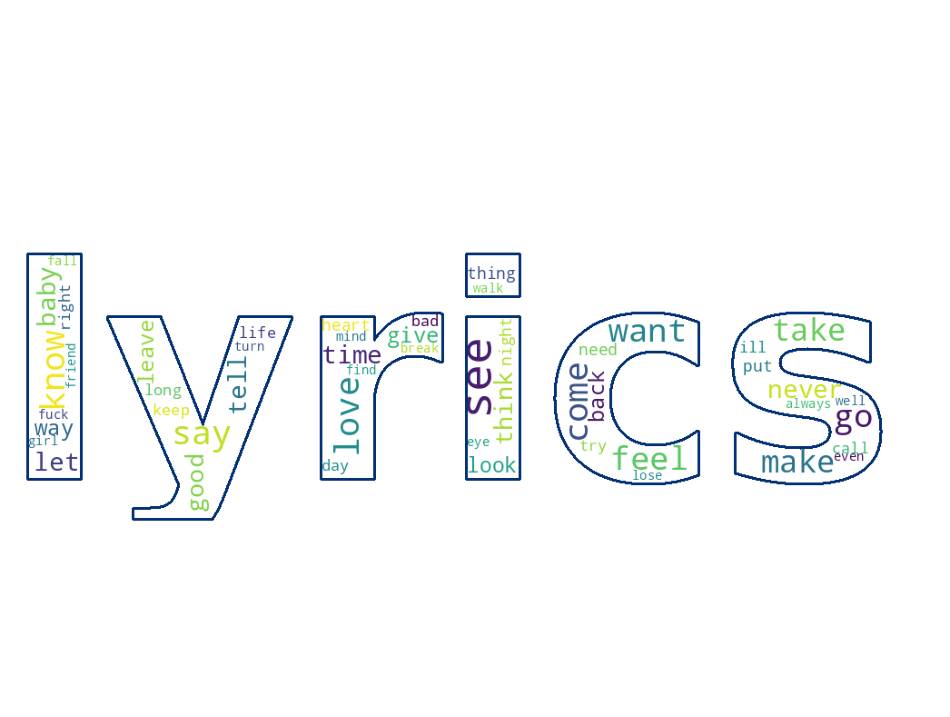

In [28]:
get_word_cloud(list(dataset_words['word']),'Text.png')